In [48]:
# Analysis modules
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import scipy

# https://stackoverflow.com/questions/34693991/repel-annotations-in-matplotlib
from matplotlib import pyplot as plt
from adjustText import adjust_text

# With Euphrasia dataset:

In [49]:
# Load dataset:
#PATH = '/home/thibauld/Documents/Bioinformatics/Bioinformatics_lab_book/2022_07_18_ROH_coelocentrum'
df = pd.read_csv('both.hom', delim_whitespace=True)
df

,FID,IID,PHE,CHR,SNP1,SNP2,POS1,POS2,KB,NSNP,DENSITY,PHOM,PHET
0,A33_1,A33,-9.0,ptg000001l,.,.,268881,359482,90.602,56,1.618,0.982,0.018
1,A33_1,A33,-9.0,ptg000001l,.,.,480036,563437,83.402,176,0.474,1.000,0.000
2,A33_1,A33,-9.0,ptg000001l,.,.,832517,951535,119.019,227,0.524,0.996,0.004
3,A33_1,A33,-9.0,ptg000001l,.,.,2363498,2450896,87.399,143,0.611,0.986,0.014
4,A33_1,A33,-9.0,ptg000001l,.,.,2561627,2653107,91.481,223,0.410,0.996,0.004
...,...,...,...,...,...,...,...,...,...,...,...,...,...
98684,A33_5,A33,-9.0,ptg000734l,.,.,25152038,25230215,78.178,65,1.203,0.954,0.015
98685,A33_5,A33,-9.0,ptg000734l,.,.,26211589,26351391,139.803,148,0.945,0.946,0.020
98686,A33_5,A33,-9.0,ptg000734l,.,.,26438019,26562372,124.354,54,2.303,0.963,0.019
98687,A33_5,A33,-9.0,ptg000734l,.,.,26824625,26917094,92.470,78,1.186,0.923,0.013


## Filtering data with number SNPs

In [50]:
# Use the list number het for the filtering:
dffilt = pd.read_csv('list_min_number_het.txt', delim_whitespace=True, index_col=0)
dffilt

,Minimum_number_SNPs
Population,
A12,87.518315
A20,150.579038
A22,76.052077
A32,97.416631
A33,92.299598
A41,151.039707
AM36,97.598975
AM7,74.848642
M23,115.085079


In [51]:
dictionary=dffilt.to_dict()
dict=dictionary['Minimum_number_SNPs']
dict

{'A12': 87.51831476842459,
 'A20': 150.57903763030038,
 'A22': 76.05207722605245,
 'A32': 97.4166310474469,
 'A33': 92.29959827638616,
 'A41': 151.03970673055647,
 'AM36': 97.59897531499,
 'AM7': 74.84864190839542,
 'M23': 115.08507913833014,
 'M27': 115.88728187869322,
 'M29': 114.22625966808104,
 'M31': 78.69540077488685,
 'M35': 95.57715740241498,
 'M8': 121.78234598792432}

In [52]:
# Filtering of the data:
# Threshold value calculated in another script:

#open an empty 
dffilt  = pd.DataFrame()

# Make a loop through the dictionnary of pop:threshold:
for f in dict:
# Select the population:
    dfsub = df[df['IID'] == f] ;
    dftemp = dfsub[dfsub['NSNP'] >= dict[f]] ;
    dffilt = dffilt.append(dftemp)
    #data = [dfint, dftemp]
    #dffinal= pd.concat(data, axis=1)


In [53]:
dffilt['IID'].unique()

array(['A12', 'A20', 'A22', 'A32', 'A33', 'A41', 'AM36', 'AM7', 'M23',
       'M27', 'M29', 'M31', 'M35', 'M8'], dtype=object)

In [54]:
# What % of ROH remaining?
a=len(df.index)
b=len(dffilt.index)
print(b/a)

0.7511171457811914


In [55]:
# What is the number of samples remaining?
len(set(dffilt['IID'])) 

14

In [56]:
df = dffilt



  # Calulate SROH, sum of ROH (Mb)

In [58]:
# Subset the df, and sum the KB column
dfsubset = df[['FID', "IID", 'KB', 'CHR']]
dfsubset.groupby('FID')['KB'].transform('sum')

1219     95252.694
1220     95252.694
1221     95252.694
1222     95252.694
1223     95252.694
           ...    
92806    61717.600
92807    61717.600
92815    61717.600
92816    61717.600
92817    61717.600
Name: KB, Length: 74127, dtype: float64

In [59]:
# Add the sum to the dataframe
dfsubset.loc[:,"SROH"]  = dfsubset.groupby(['FID', 'CHR'])['KB'].transform('sum')
dfsubset

/home/thibauld/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


,FID,IID,KB,CHR,SROH
1219,A12_1,A12,76.532,ptg000001l,2563.920
1220,A12_1,A12,89.370,ptg000001l,2563.920
1221,A12_1,A12,156.581,ptg000001l,2563.920
1222,A12_1,A12,117.264,ptg000001l,2563.920
1223,A12_1,A12,130.647,ptg000001l,2563.920
...,...,...,...,...,...
92806,M8_8,M8,243.516,ptg000734l,1609.701
92807,M8_8,M8,196.112,ptg000734l,1609.701
92815,M8_8,M8,117.370,ptg000734l,1609.701
92816,M8_8,M8,147.312,ptg000734l,1609.701


In [60]:
# Now, removing the rows that have same ID, CHR, and SROH value. 
dfsu = dfsubset.drop_duplicates(subset=['FID', 'CHR'], keep='last').drop('KB', axis=1)
dfsu

,FID,IID,CHR,SROH
1250,A12_1,A12,ptg000001l,2563.920
1276,A12_1,A12,ptg000002l,2722.752
1309,A12_1,A12,ptg000003l,3773.395
1340,A12_1,A12,ptg000007l,3396.605
1346,A12_1,A12,ptg000008l,588.166
...,...,...,...,...
92790,M8_8,M8,ptg000098l,786.890
92793,M8_8,M8,ptg000109l,291.533
92797,M8_8,M8,ptg000135l,369.351
92798,M8_8,M8,ptg000144l,134.257


In [61]:
# Pivot the dataset to have one 
dffinal = dfsu.pivot(index='CHR', columns='FID')
dffinal

IID                                                        ...  \
FID        A12_1 A12_2 A12_3 A12_4 A12_5 A12_6 A12_7 A12_8 A12_9 A20_1  ...   
CHR                                                                     ...   
ptg000001l   A12   A12   A12   A12   A12   A12   A12   A12   A12   A20  ...   
ptg000002l   A12   A12   A12   A12   A12   A12   A12   A12   A12   A20  ...   
ptg000003l   A12   A12   A12   A12   A12   A12   A12   A12   A12   A20  ...   
ptg000005l   NaN   A12   A12   A12   A12   A12   A12   A12   NaN   A20  ...   
ptg000007l   A12   A12   A12   A12   A12   A12   A12   A12   A12   A20  ...   
...          ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   
ptg000135l   NaN   A12   A12   NaN   A12   A12   A12   NaN   NaN   A20  ...   
ptg000136l   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
ptg000141l   NaN   NaN   NaN   NaN   A12   NaN   NaN   NaN   A12   NaN  ...   
ptg000144l   NaN   A12   NaN   A12   A12   A12   A12   A12   A12   A20  ...   
ptg000734l   A12   A12   A12   A12   A12   A12   A12   NaN   NaN   A20  ...   

                SROH                                                    \
FID            M35_7    M35_8       M8_1      M8_2      M8_3      M8_4   
CHR                                                                      
ptg000001l  3744.621  249.680   8358.792  7946.769  3810.424  3728.989   
ptg000002l  4031.172      NaN  10269.832  9413.987  4924.628  5244.040   
ptg000003l  1795.171      NaN   3851.941  3552.832  2191.407  1946.939   
ptg000005l   681.711  172.273   1663.967  1874.427   710.377   929.507   
ptg000007l  3253.150      NaN   5324.284  5187.059  2539.085  3388.678   
...              ...      ...        ...       ...       ...       ...   
ptg000135l   232.852      NaN    823.914   791.484   607.677   365.745   
ptg000136l       NaN      NaN        NaN       NaN       NaN       NaN   
ptg000141l       NaN      NaN        NaN       NaN       NaN       NaN   
ptg000144l   248.436      NaN    355.149   354.248    77.573   219.105   
ptg000734l  2241.875  185.318   3357.295  3150.006  1140.047  1728.718   

                                                    
FID             M8_5      M8_6      M8_7      M8_8  
CHR                                                 
ptg000001l  3944.888  3782.356  4060.662  3733.759  
ptg000002l  4787.942  4847.520  5230.157  4827.066  
ptg000003l  2353.150  1624.650  2386.385  1795.701  
ptg000005l   803.523   785.872   658.100   875.437  
ptg000007l  2987.622  2649.772  3100.750  2510.636  
...              ...       ...       ...       ...  
ptg000135l   462.066   456.090   731.029   369.351  
ptg000136l       NaN       NaN       NaN       NaN  
ptg000141l       NaN    76.264       NaN       NaN  
ptg000144l   104.008   134.095       NaN   134.257  
ptg000734l  1350.500  1108.484  1307.397  1609.701  

[64 rows x 220 columns]

In [62]:
dfna = dffinal.fillna(0)

In [63]:
sumroh = dfna.sum(axis=0)
dfr = pd.DataFrame(sumroh)

/home/thibauld/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


In [64]:
dfg = dfr.droplevel(0, axis=0)

In [65]:
dfh = dfg.rename({0: 'SROH'}, axis='columns')

In [66]:
#baits_size = 1988179

In [67]:
dfsumROH = pd.DataFrame(dfh['SROH'])
dfsumROH

,SROH
FID,
A12_1,95252.694
A12_2,99535.726
A12_3,56382.043
A12_4,63075.008
A12_5,184044.547
...,...
M8_4,65559.002
M8_5,66464.063
M8_6,66807.026


# Calculate the NROH (total number of ROH)

In [68]:
# Add a count column to the dataframe

cols=['FID', 'CHR']

df['count']  = df.groupby(cols)['FID'].transform('count')
df.sort_values(by='count')

,FID,IID,PHE,CHR,SNP1,SNP2,POS1,POS2,KB,NSNP,DENSITY,PHOM,PHET,count
62689,M31_6,M31,-9.0,ptg000023l,.,.,3120152,3207289,87.138,637,0.137,0.987,0.003,1
39794,A41_7,A41,-9.0,ptg000086l,.,.,428965,523513,94.549,228,0.415,0.982,0.013,1
82293,M23_7,M23,-9.0,ptg000037l,.,.,261175,472945,211.771,126,1.681,0.944,0.008,1
33473,A33_7,A33,-9.0,ptg000086l,.,.,429421,508350,78.930,136,0.580,0.956,0.007,1
54888,M29_7,M29,-9.0,ptg000086l,.,.,438006,539886,101.881,364,0.280,0.964,0.008,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11855,A32_1,A32,-9.0,ptg000001l,.,.,23045069,23145705,100.637,112,0.899,0.982,0.009,90
11854,A32_1,A32,-9.0,ptg000001l,.,.,22818129,22991603,173.475,402,0.432,0.980,0.017,90
11853,A32_1,A32,-9.0,ptg000001l,.,.,18938831,19050197,111.367,112,0.994,0.955,0.018,90
11862,A32_1,A32,-9.0,ptg000001l,.,.,25782612,25862135,79.524,168,0.473,0.952,0.018,90


In [70]:
dfsubset = df[["FID", "IID", "CHR", 'KB', 'count']]
dfsubset.sort_values(by='count')

,FID,IID,CHR,KB,count
62689,M31_6,M31,ptg000023l,87.138,1
39794,A41_7,A41,ptg000086l,94.549,1
82293,M23_7,M23,ptg000037l,211.771,1
33473,A33_7,A33,ptg000086l,78.930,1
54888,M29_7,M29,ptg000086l,101.881,1
...,...,...,...,...,...
11855,A32_1,A32,ptg000001l,100.637,90
11854,A32_1,A32,ptg000001l,173.475,90
11853,A32_1,A32,ptg000001l,111.367,90
11862,A32_1,A32,ptg000001l,79.524,90


In [71]:
# Remove the duplicates from the dataframe
dfd = dfsubset.drop_duplicates(['FID', 'CHR']).sort_values(by='count')
dfkl = dfd.drop('KB', axis=1)

In [72]:
# transpose the dataframe
dffinal = dfkl.pivot(index='CHR', columns='FID')

In [73]:
dffinal

IID                                                        ...  \
FID        A12_1 A12_2 A12_3 A12_4 A12_5 A12_6 A12_7 A12_8 A12_9 A20_1  ...   
CHR                                                                     ...   
ptg000001l   A12   A12   A12   A12   A12   A12   A12   A12   A12   A20  ...   
ptg000002l   A12   A12   A12   A12   A12   A12   A12   A12   A12   A20  ...   
ptg000003l   A12   A12   A12   A12   A12   A12   A12   A12   A12   A20  ...   
ptg000005l   NaN   A12   A12   A12   A12   A12   A12   A12   NaN   A20  ...   
ptg000007l   A12   A12   A12   A12   A12   A12   A12   A12   A12   A20  ...   
...          ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   
ptg000135l   NaN   A12   A12   NaN   A12   A12   A12   NaN   NaN   A20  ...   
ptg000136l   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
ptg000141l   NaN   NaN   NaN   NaN   A12   NaN   NaN   NaN   A12   NaN  ...   
ptg000144l   NaN   A12   NaN   A12   A12   A12   A12   A12   A12   A20  ...   
ptg000734l   A12   A12   A12   A12   A12   A12   A12   NaN   NaN   A20  ...   

           count                                                        
FID        M35_7 M35_8  M8_1  M8_2  M8_3  M8_4  M8_5  M8_6  M8_7  M8_8  
CHR                                                                     
ptg000001l  32.0   3.0  66.0  63.0  33.0  25.0  32.0  29.0  34.0  32.0  
ptg000002l  36.0   NaN  65.0  59.0  37.0  38.0  33.0  37.0  39.0  36.0  
ptg000003l  20.0   NaN  30.0  26.0  20.0  18.0  20.0  15.0  23.0  18.0  
ptg000005l   6.0   1.0  15.0  17.0   6.0   9.0   6.0   6.0   6.0   9.0  
ptg000007l  27.0   NaN  40.0  39.0  20.0  26.0  24.0  21.0  23.0  20.0  
...          ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  
ptg000135l   2.0   NaN   7.0   7.0   6.0   4.0   5.0   5.0   7.0   4.0  
ptg000136l   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
ptg000141l   NaN   NaN   NaN   NaN   NaN   NaN   NaN   1.0   NaN   NaN  
ptg000144l   2.0   NaN   3.0   3.0   1.0   2.0   1.0   1.0   NaN   1.0  
ptg000734l  15.0   2.0  20.0  18.0   8.0  10.0   8.0   6.0   8.0  10.0  

[64 rows x 220 columns]

In [74]:
# Remove NA in table
dfna = dffinal.fillna(0)

In [75]:
# check level of indexing
nblevels = dfna.index.nlevels

In [76]:
# sum of the dataframe for each species
sumroh = dfna.sum(axis=0)
dfr = pd.DataFrame(sumroh)

/home/thibauld/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


In [77]:
# Remove one level of the index
dfg = dfr.droplevel(0, axis=0)

In [78]:
# Rename the ROH column
dfNROH = dfg.rename({0: 'NROH'}, axis='columns')

In [79]:
dfNROH

,NROH
FID,
A12_1,701.0
A12_2,744.0
A12_3,447.0
A12_4,486.0
A12_5,1374.0
...,...
M8_4,549.0
M8_5,552.0
M8_6,559.0


In [80]:
dfNROH.append(dfsumROH)

,NROH,SROH
FID,,
A12_1,701.0,NaN
A12_2,744.0,NaN
A12_3,447.0,NaN
A12_4,486.0,NaN
A12_5,1374.0,NaN
...,...,...
M8_4,NaN,65559.002
M8_5,NaN,66464.063
M8_6,NaN,66807.026


In [81]:
dfNROH['SROH'] = dfsumROH
dfNROH

,NROH,SROH
FID,,
A12_1,701.0,95252.694
A12_2,744.0,99535.726
A12_3,447.0,56382.043
A12_4,486.0,63075.008
A12_5,1374.0,184044.547
...,...,...
M8_4,549.0,65559.002
M8_5,552.0,66464.063
M8_6,559.0,66807.026


In [82]:
# Add FROH, the FROH isthe fraction of each genome in ROH > 0.5 Mb => ACTUALLY no ROH > 0.2 Mb!!!! We try this time without filtering.
# No filtering: all data included.
# In the stats_genome_file.txt
# Begonia_peltatifolia_scaffold	310462054  = 310,462,054 = 310462 Kb

# Input genome length (in Kb):
GEN_LENGTH = 1182020

dfNROH['FROH'] = dfNROH['SROH'] / GEN_LENGTH

In [83]:
dfNROH.to_csv('matrix_ROH.csv')

In [87]:
dfNROH['Population'] = dfNROH.index.str[:-2]
dfNROH['Species'] = dfNROH.index.str[:-3]

In [88]:
dfNROH

,NROH,SROH,FROH,Population,Species
FID,,,,,
A12_1,701.0,95252.694,0.080585,A12,A1
A12_2,744.0,99535.726,0.084208,A12,A1
A12_3,447.0,56382.043,0.047700,A12,A1
A12_4,486.0,63075.008,0.053362,A12,A1
A12_5,1374.0,184044.547,0.155703,A12,A1
...,...,...,...,...,...
M8_4,549.0,65559.002,0.055464,M8,M
M8_5,552.0,66464.063,0.056229,M8,M
M8_6,559.0,66807.026,0.056519,M8,M


In [89]:
#dfNROH.to_csv('matrix_plot.csv')

In [90]:
dfNROH = pd.read_csv('matrix_plot.csv')
dfNROH

,FID,NROH,SROH,FROH,Population,Species
0,A12_1,701,95252.694,0.080585,A12,A
1,A12_2,744,99535.726,0.084208,A12,A
2,A12_3,447,56382.043,0.047700,A12,A
3,A12_4,486,63075.008,0.053362,A12,A
4,A12_5,1374,184044.547,0.155703,A12,A
...,...,...,...,...,...,...
105,M8_4,549,65559.002,0.055464,M8,M
106,M8_5,552,66464.063,0.056229,M8,M
107,M8_6,559,66807.026,0.056519,M8,M
108,M8_7,592,70923.864,0.060002,M8,M


### Full samples, hue by sections:

In [91]:
# Analysis modules
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
import sys
import scipy
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

# Analysis modules
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import scipy

# https://stackoverflow.com/questions/34693991/repel-annotations-in-matplotlib
from matplotlib import pyplot as plt
from adjustText import adjust_text

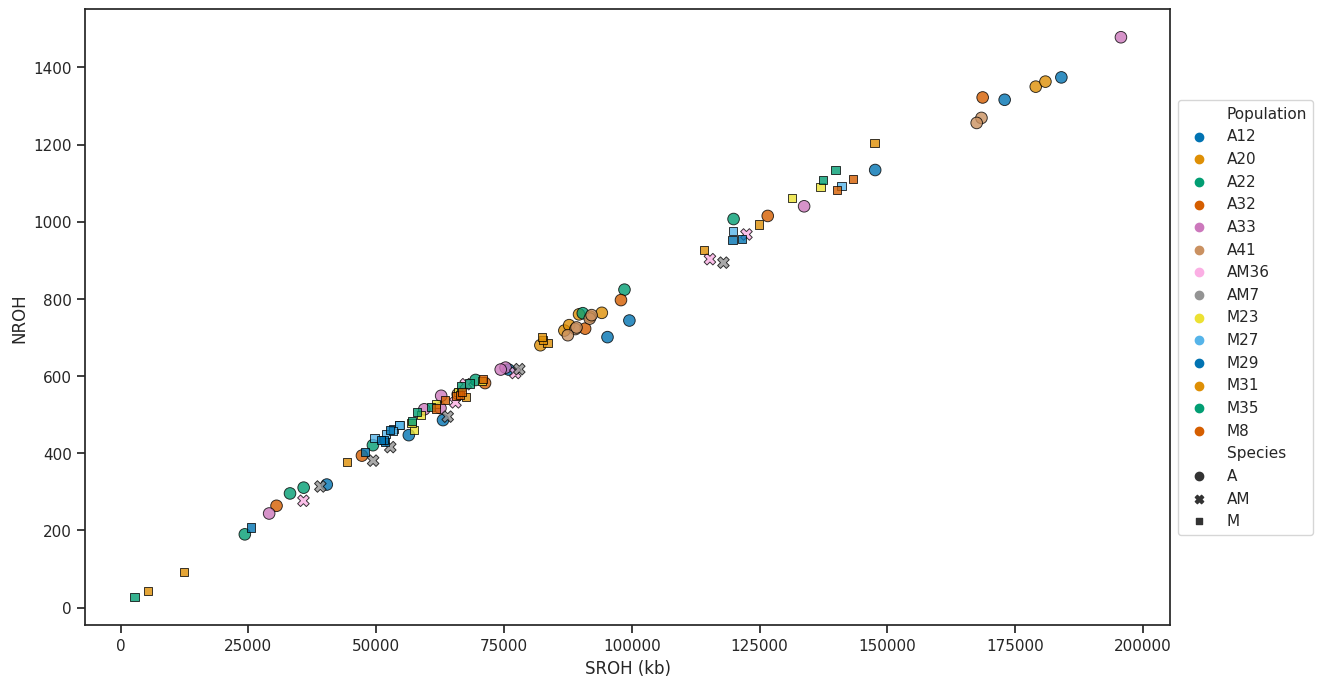

In [92]:
df= dfNROH

# Draw the scatterplot:
plt.figure(figsize=(14,8))
sns.set_theme(style="ticks")
ax = sns.scatterplot(x='SROH', y='NROH', data=df, alpha=0.8, hue='Population', palette='colorblind', style='Species', edgecolor= 'black', s=70)
ax.set_xlabel("SROH (kb)")
#ax.set_title("Estimator of Run Of Homozygosity for all Coelocentrum specimens")
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))


dflabel = df[['NROH', 'SROH']]
# Input the annotation:
# https://stackoverflow.com/questions/15910019/annotate-data-points-while-plotting-from-pandas-dataframe
# Input the annotation:
# https://stackoverflow.com/questions/15910019/annotate-data-points-while-plotting-from-pandas-dataframe
#for k, v in dflabel.iterrows():
#    ax.annotate(k, v, xytext=(0, 0), textcoords='offset points', family='sans-serif', fontsize=12, color='darkslategrey')

x = dflabel['SROH'].to_list()
y = dflabel['NROH'].to_list()
s = dflabel.index.to_list()

#texts = [plt.text(x[i], y[i], s[i]) for i in range(len(x))]
#adjust_text(texts, arrowprops=dict(arrowstyle='-', color='grey'))


fig = ax.get_figure()
fig.savefig('./plots/plot_SROH_NROH.png', dpi=400, bbox_inches='tight')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


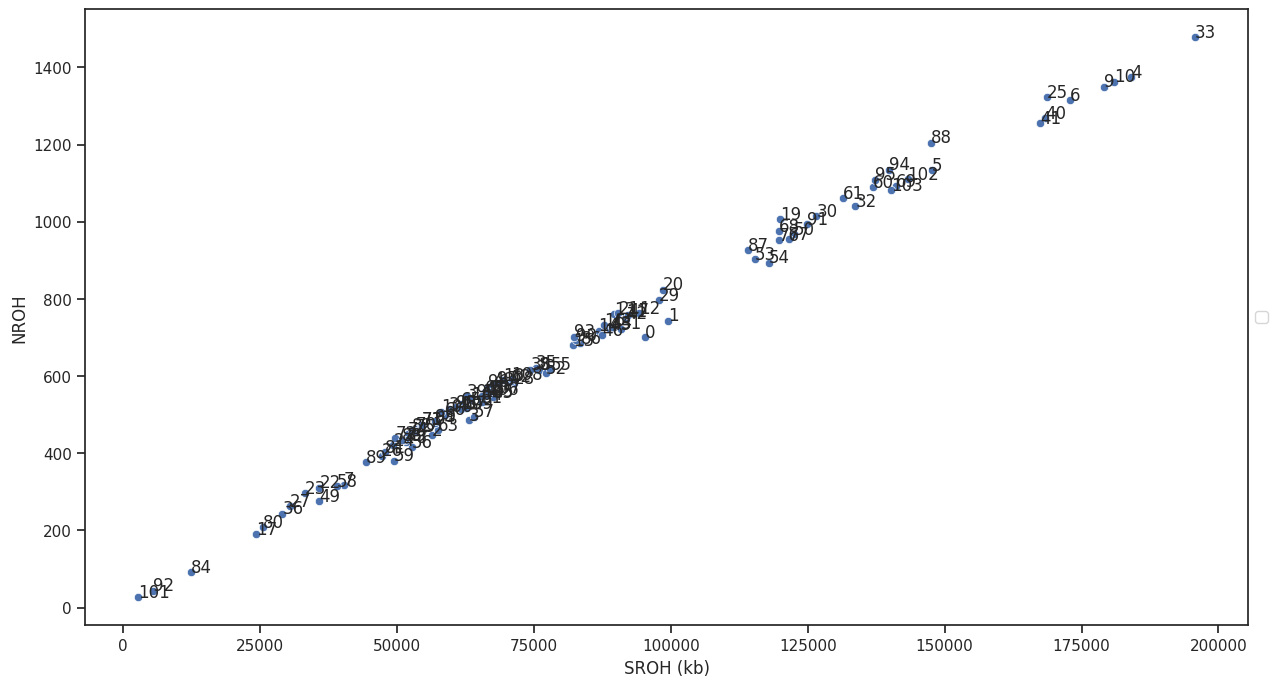

In [93]:
df= dfNROH

# Draw the scatterplot:
plt.figure(figsize=(15,8))
sns.set_theme(style="ticks")
ax = sns.scatterplot(x='SROH', y='NROH', data=df, alpha=1)
ax.set_xlabel("SROH (kb)")
#ax.set_title("Estimator of Run Of Homozygosity for all Coelocentrum specimens")
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))


dflabel = df[['NROH', 'SROH']]
# Input the annotation:
# https://stackoverflow.com/questions/15910019/annotate-data-points-while-plotting-from-pandas-dataframe
# Input the annotation:
# https://stackoverflow.com/questions/15910019/annotate-data-points-while-plotting-from-pandas-dataframe
#for k, v in dflabel.iterrows():
#    ax.annotate(k, v, xytext=(0, 0), textcoords='offset points', family='sans-serif', fontsize=12, color='darkslategrey')

x = dflabel['SROH'].to_list()
y = dflabel['NROH'].to_list()
s = dflabel.index.to_list()

texts = [plt.text(x[i], y[i], s[i]) for i in range(len(x))]
#adjust_text(texts, arrowprops=dict(arrowstyle='-', color='grey'))


fig = ax.get_figure()
fig.savefig('./plots/plot_SROH_NROH_annots.png', dpi=400, bbox_inches='tight')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


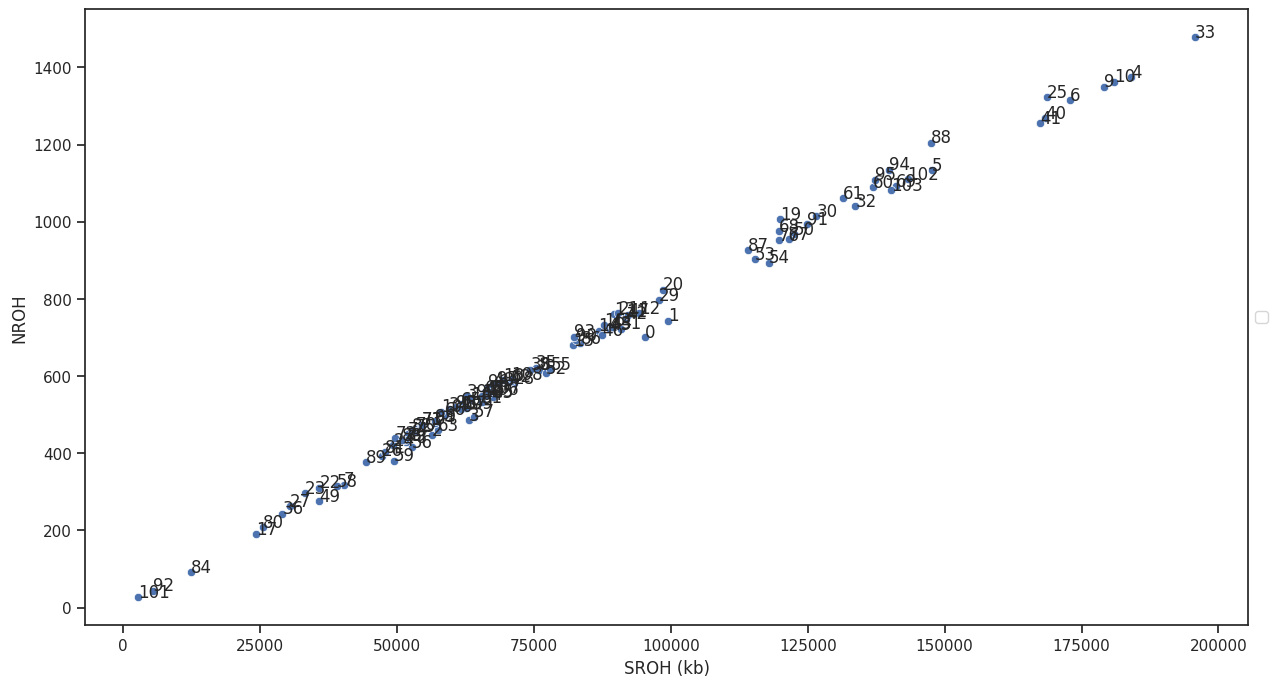

In [94]:
df= dfNROH

# Draw the scatterplot:
plt.figure(figsize=(15,8))
sns.set_theme(style="ticks")
ax = sns.scatterplot(x='SROH', y='NROH', data=df, alpha=1)
ax.set_xlabel("SROH (kb)")
#ax.set_title("Estimator of Run Of Homozygosity for all Coelocentrum specimens")
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))


dflabel = df[['NROH', 'SROH']]
# Input the annotation:
# https://stackoverflow.com/questions/15910019/annotate-data-points-while-plotting-from-pandas-dataframe
# Input the annotation:
# https://stackoverflow.com/questions/15910019/annotate-data-points-while-plotting-from-pandas-dataframe
#for k, v in dflabel.iterrows():
#    ax.annotate(k, v, xytext=(0, 0), textcoords='offset points', family='sans-serif', fontsize=12, color='darkslategrey')

x = dflabel['SROH'].to_list()
y = dflabel['NROH'].to_list()
s = dflabel.index.to_list()

texts = [plt.text(x[i], y[i], s[i]) for i in range(len(x))]
#adjust_text(texts, arrowprops=dict(arrowstyle='-', color='grey'))


fig = ax.get_figure()
fig.savefig('./plots/plot_SROH_NROH_annots.png', dpi=400, bbox_inches='tight')

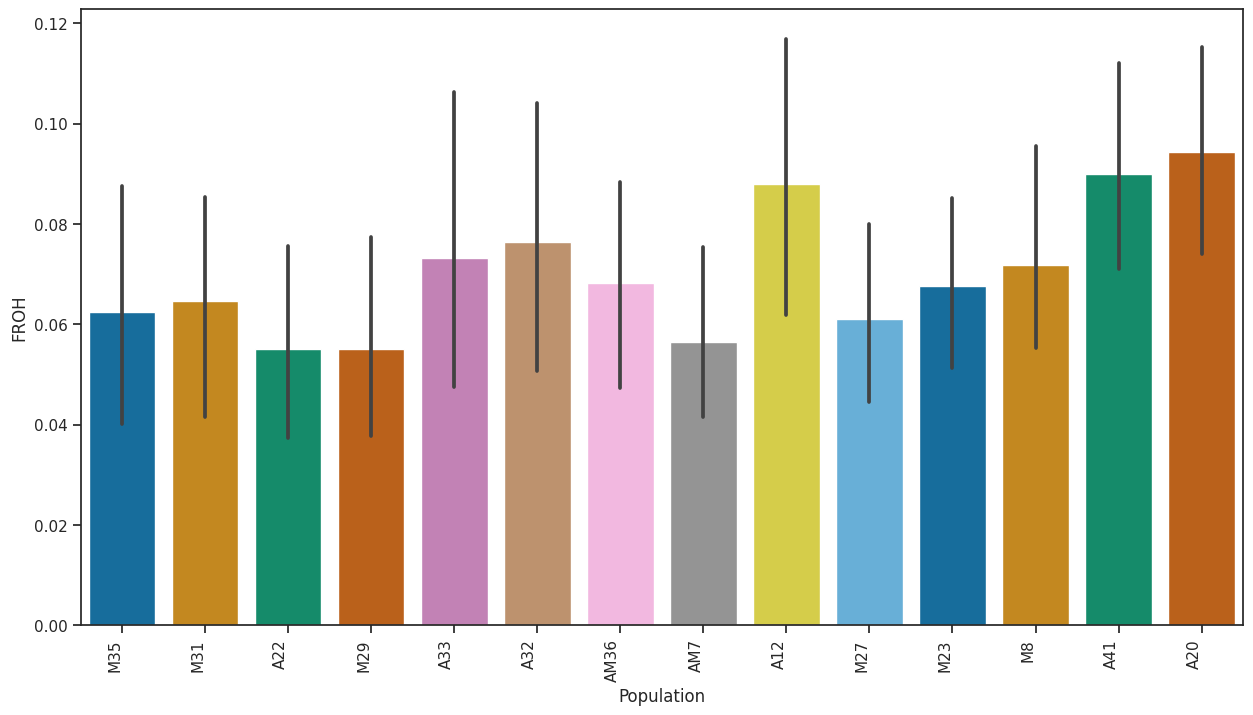

In [98]:
plt.figure(figsize=(15,8))
sns.set_theme(style='ticks')

dfplot = df

dfplot['IID'] = df.index

dfpl = dfplot.sort_values(by='FROH')




ax = sns.barplot(x=dfpl['Population'], y=dfpl['FROH'], palette='colorblind')
plt.xticks(rotation=90, ha='right');

fig = ax.get_figure()
fig.savefig('./plots/plot_FROH.png', dpi=400, bbox_inches='tight')


In [ ]:
dfpl

In [ ]:
# Use the key to put sample ID in dfroh:
dfROH

In [ ]:
# Modified dataframe with FST:

df = pd.read_csv('matrix_ROH_FIS.csv', index_col=0)
df

In [ ]:
# Draw the scatterplot:
plt.figure(figsize=(15,8))
sns.set_theme(style="ticks")
ax = sns.scatterplot(x='SROH', y='NROH', data=df, alpha=1, hue='FIS', s=500)
ax.set_xlabel("SROH (kb)")
#ax.set_title("Estimator of Run Of Homozygosity for all Coelocentrum specimens")
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))


dflabel = df[['NROH', 'SROH']]
# Input the annotation:
# https://stackoverflow.com/questions/15910019/annotate-data-points-while-plotting-from-pandas-dataframe
# Input the annotation:
# https://stackoverflow.com/questions/15910019/annotate-data-points-while-plotting-from-pandas-dataframe
#for k, v in dflabel.iterrows():
#    ax.annotate(k, v, xytext=(0, 0), textcoords='offset points', family='sans-serif', fontsize=12, color='darkslategrey')

x = dflabel['SROH'].to_list()
y = dflabel['NROH'].to_list()
s = dflabel.index.to_list()

texts = [plt.text(x[i], y[i], s[i]) for i in range(len(x))]
#adjust_text(texts, arrowprops=dict(arrowstyle='-', color='grey'))


fig = ax.get_figure()
fig.savefig('./plots/plot_SROH_NROH_annots_fIS.png', dpi=400, bbox_inches='tight')